# Transit Chatbot

This chatbot is designed to help customers find transit-related information quickly and efficiently. At this stage, it provides information on the next bus's arrival time at a given stop and step-by-step directions from point A to point B. 

This project was done as part of a team effort at a one-day hackaton at [TransLink](www.translink.ca) and was awarded the "face-lift" prize along with two other projects. 

The chatbot is built using [Rasa](https://rasa.com/), an open-source library for conversational AI. The [Rasa Stack](https://rasa.com/products/rasa-stack/) consists of two main components: Rasa NLU and Rasa Core. The figure below decribes Rasa's ecosystem:

![](https://rasa.com/assets/img/rasa-ecosystem.png)


### Rasa NLU

Rasa NLU is a natural language understanding tool that allows machines to interpert natual language inputs in the form of text or speech. This is acheived by performing two tasks: intent classification and entity extraction. For example, a user input: "When is the next bus #8 coming at stop number 50234?" can be classified with an intent of checking the next bus's arrival time while the bus number and the stop number are the extracted entities. Rasa NLU provides a flexibile framework that allows the users to choose from pre-defined pipelines or defined their own custom pipelines. The [official documenation](https://rasa.com/docs/nlu/0.13.8/choosing_pipeline/) describes this in detail. In short, choosing an intent classification model or an entity extraction model is fairly straightforward. In this project, since the training data is relatively small (<1000 training examples) and we are developing the bot to operate in English (which is available as a [SpaCy](https://spacy.io/) langaue model), we chose the `spacy_sklearn` pipeline. SpaCy is an open-source library for advanced natural language processing (NLP) - it provides the underlying text processing capabilities for our chatbot. As described by its developers: "_SpaCy comes with pre-trained statistical models and word vectors, and currently supports tokenization for 30+ languages. It features the fastest syntactic parser in the world, convolutional neural network models for tagging, parsing and named entity recognition and easy deep learning integration. It's commercial open-source software, released under the MIT license._" An introduction to SpaCy can be found [here](https://spacy.io/usage/spacy-101#section-features). We specifically use the following Spacy's NLP tools: the language model represented by word vectors -  multi-dimensional meaning representations of words that allows us to determine how similar they are to each other, a tokenizer - which splits the sentence into tokens, and a featurizer - which transforms the sentence into a vector representation. We could use the named entity recognition (ner) pre-trained models, however, since we are dealing with custom entities, we trained a conditional random field model. We also trained a sklearn's support vector machine (SVM) model to classify users' intents. Rasa NLU provides a nice wrapper for these models as defined in the processing pipeline which defines how structured data is extracted from unstructured user inputs. 

### Rasa Core

Rasa Core is the dialogue engine that generates responses to users based on state of the coversation. Rasa Core achieves this by utilizing machine learning rather than state machines or rigid rules. This is how Rasa Core works:

![](https://rasa.com/docs/core/_images/rasa_arch_colour.png)

_The steps are (according to the [documentation](https://rasa.com/docs/core/architecture/)):_
1. The message is received and passed to an Interpreter, which converts it into a dictionary including the original text, the intent, and any entities that were found.
2. The Tracker is the object which keeps track of conversation state. It receives the info that a new message has come in.
3. The policy receives the current state of the tracker.
4. The policy chooses which action to take next.
5. The chosen action is logged by the tracker.
6. A response is sent to the user.

.... to be continued 

### Installation
You will need to install [Rasa NLU](https://rasa.com/docs/nlu/installation/), [Rasa Core](https://rasa.com/docs/core/installation/) and a [SpaCy language model](https://spacy.io/usage/models#section-install).

These resourses were very useful while working on this project:
1. https://rasa.com/docs/ ##Rasa documentation
2. https://spacy.io/ ##SpaCy documentation
3. https://github.com/RasaHQ/rasa-workshop-pydata-berlin ##Workshop at Pydata by @JustinaPetr 
4. https://github.com/RasaHQ/starter-pack-rasa-stack ##Rasa Stack starter-pack
5. https://developer.translink.ca/ServicesRtti/ApiReference ##TansLink next bus API documentation
6. https://developers.google.com/maps/documentation/directions/intro ##Google Maps directions API documentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import rasa_nlu
import rasa_core
import spacy
import nbmultitask
import sklearn_crfsuite

print("pandas_" + pd.__version__)
print("numpy_" + np.__version__)
print("matplotlib_" + matplotlib.__version__)
print("rasa_nlu_" + rasa_nlu.__version__)
print("rasa_core_" + rasa_core.__version__)
print("spacy_" + spacy.__version__)
print("sklearn-crfsuite_" + "0.3.6")
print("nbmultitask_" + "0.1.0")



pandas_0.22.0
numpy_1.16.1
matplotlib_2.1.2
rasa_nlu_0.13.8
rasa_core_0.12.3
spacy_2.0.18
sklearn-crfsuite_0.3.6
nbmultitask_0.1.0


## Jupyter notebook configuration

In [2]:
import matplotlib

In [3]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

# helper function to pretty print json
def pprint(o):
    print(json.dumps(o, indent=2))

## Import Rasa NLU, Rasa Core, and Spacy

In [4]:
import rasa_nlu
import rasa_core
import spacy

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))
print("Loading spaCy language model...")
print(spacy.load("en")("Hello world!"))

rasa_nlu: 0.13.8 rasa_core: 0.12.3
Loading spaCy language model...
Hello world!


## Rasa NLU Model
We will build an NLU model as described above to teach our chatbot how to understand user inputs.

### Configuring the NLU model
We define the processing pipeline by specifiying the tools/models we will use to turnunstructured user inputs to  structured data. As we discussed above, we will use the `spacy_sklearn` pipeline.

In [5]:
config = """
language: "en"

pipeline: "spacy_sklearn"
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


### Creating training data for the NLU model


... details to be added

### Training the NLU model
We use the training data and the model configuration to develp the NLU model.

In [6]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("data/data.json")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of data/data.json is rasa_nlu
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 322 (7 distinct intents)
	- Found intents: 'goodbye', 'thanks', 'greet', 'search_trip', 'garbage', 'affirm', 'search_bus_time'
	- entity examples: 133 (4 distinct entities)
	- found entities: 'stop_number', 'location_end', 'line_number', 'location_start'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_entity_featurizer_re

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.2s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/home/jovyan/work/models/nlu/default/current'


### Evaluating the model

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of data/data.json is rasa_nlu
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 322 (7 distinct intents)
	- Found intents: 'search_trip', 'thanks', 'goodbye', 'affirm', 'search_bus_time', 'garbage', 'greet'
	- entity examples: 133 (4 distinct entities)
	- found entities: 'stop_number', 'location_end', 'location_start', 'line_number'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 322 examples that have a defined intent out of 322 examples
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
                 precision    recall  f1-score   support

         affirm       1.00      1.00      1.00        24
        garbage       1.00      1.00   

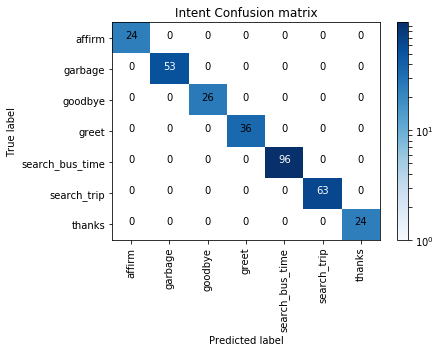

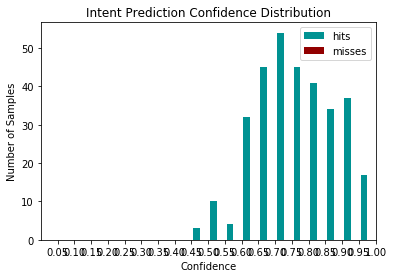

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9975254750938358
INFO:rasa_nlu.evaluate:Precision: 0.9975499653354858
INFO:rasa_nlu.evaluate:Accuracy:  0.997513983840895
INFO:rasa_nlu.evaluate:Classification report: 
                precision    recall  f1-score   support

   line_number       1.00      1.00      1.00        52
  location_end       0.97      0.99      0.98        99
location_start       1.00      1.00      1.00        92
     no_entity       1.00      1.00      1.00      1325
   stop_number       1.00      1.00      1.00        41

   avg / total       1.00      1.00      1.00      1609



In [7]:
#on the training data
from rasa_nlu.evaluate import run_evaluation

run_evaluation("data/data.json", model_directory)

In [8]:
#using cross validation
import sys
python = sys.executable

!{python} -m rasa_nlu.evaluate \
    --data data/data.json \
    --config config.yml \
    --mode crossvalidation

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2019-02-12 22:28:27 INFO     rasa_nlu.training_data.loading  - Training data format of data/data.json is rasa_nlu
2019-02-12 22:28:27 INFO     rasa_nlu.training_data.training_data  - Training data stats: 
	- intent examples: 322 (7 distinct intents)
	- Found intents: 'search_bus_time', 'goodbye', 'greet', 'garbage', 'search_trip', 'affirm', 'thanks'
	- entity examples: 133 (4 distinct entities)
	- found entities: 'location_start', 'location_end', 'stop_number', 'line_number'

2019-02-12 22:28:27 INFO     rasa_nlu.training_data.training_data  - Training data stats: 
	- intent examples: 322 (7 distinct intents)
	- Found intents: 'search_bus_time', 'goodbye', 'greet', 'garbage', 'search_tri

2019-02-12 22:28:52 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Starting to train component tokenizer_spacy
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Starting to train component intent_featurizer_spacy
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Starting to train component intent_entity_featurizer_regex
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Starting to train component ner_crf
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Starting to train component ner_synonyms
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:28:52 INFO     rasa_nlu.model  - Starting to train component in

2019-02-12 22:29:25 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Starting to train component tokenizer_spacy
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Starting to train component intent_featurizer_spacy
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Starting to train component intent_entity_featurizer_regex
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Starting to train component ner_crf
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Starting to train component ner_synonyms
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:25 INFO     rasa_nlu.model  - Starting to train component in

2019-02-12 22:29:59 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:59 INFO     rasa_nlu.model  - Starting to train component ner_synonyms
2019-02-12 22:29:59 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:29:59 INFO     rasa_nlu.model  - Starting to train component intent_classifier_sklearn
Fitting 4 folds for each of 6 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.1s finished
2019-02-12 22:30:02 INFO     rasa_nlu.model  - Finished training component.
2019-02-12 22:30:08 INFO     rasa_nlu.training_data.training_data  - Training data stats: 
	- intent examples: 293 (7 distinct intents)
	- Found intents: 'search_bus_time', 'goodbye', 'greet', 'garbage', 'search_trip', 'affirm', 'thanks'
	- entity examples: 119 (4 distinct entities)
	- found entities: 'location_start', 'location_end', 'stop_number', 'line_number'

2019-02-12 22:30:08 INFO     rasa_nlu.training_data.training_data  - Training data sta

### Testing the model

In [9]:
pprint(interpreter.parse("how can I go to 41 and 22 from 161 and 4th west?"))
#pprint(interpreter.parse("How can I go from Metrotown to Rogers Arena?"))

{
  "intent": {
    "name": "search_bus_time",
    "confidence": 0.5954699729249929
  },
  "entities": [
    {
      "start": 16,
      "end": 25,
      "value": "41 and 22",
      "entity": "location_end",
      "confidence": 0.689124734593772,
      "extractor": "ner_crf"
    },
    {
      "start": 31,
      "end": 47,
      "value": "161 and 4th west",
      "entity": "location_start",
      "confidence": 0.5595530674964584,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "search_bus_time",
      "confidence": 0.5954699729249929
    },
    {
      "name": "search_trip",
      "confidence": 0.31670841458362853
    },
    {
      "name": "garbage",
      "confidence": 0.043082845951026676
    },
    {
      "name": "thanks",
      "confidence": 0.020606950173893378
    },
    {
      "name": "goodbye",
      "confidence": 0.010195032610563346
    },
    {
      "name": "greet",
      "confidence": 0.008965088860387485
    },
    {
      "name": "affi

## Rasa Core Model

### Configure the domain file

In [10]:
#https://rasa.com/docs/core/domains/

domain_yml = """
intents:
- greet
- affirm
- thanks
- goodbye
- search_bus_time
- search_trip
- garbage

slots:
  line_number:
    type: text
    
  stop_number:
    type: text
    
  location_start:
    type: text
  
  location_end:
    type: text    
    
entities:
- line_number
- stop_number
- location_start
- location_end

actions:
- utter_greet
- utter_goodbye
- utter_thanks
- utter_garbage
- utter_affirm
- utter_ask_line_number
- utter_ask_stop_number
- utter_ask_location_start
- utter_ask_location_end
- action_next_bus
- action_trip

templates:
  utter_greet:
  - text: "Hey! How can help you?"
  - text: "Hello! How can help you?"
  - text: "Hi, traveller! How can help you?"
  - text: "Greetings, welcome to the future! How can help you?"
  
  utter_affirm:
  - text: "Great!"
  - text: "Awesome!"
  - text: "Perfect!"

  utter_thanks:
  - text: "You are very welcome!"
  - text: "Anytime!"
  - text: "My pleasure!"
  
  utter_goodbye:
  - text: "Bye"
  - text: "See you soon!"
  - text: "Goodbye!"
  - text: "Safe trip!"
  - text: "Happy travelling!"

  utter_garbage:
  - text: "I am not sure what you are aiming for. Please give me more specific information such as the stop number and the bus line or the origin and destination for your trip."
  - text: "Huh, come again?! Please give me more specific information such as the stop number and the bus line or the origin and destination for your trip."
  - text: "Hmm ... not sure what you're asking? Please provide more specific information such as the stop number and the bus line or the origin and destination for your trip."
  - text: "Hmm ... I am still learning! Can you rephrase that please? It's easier for me if you give me specific information such as the stop number and the bus line or the origin and destination for your trip."
  - text: "What do you mean? It'd be easier for me if you included specific information such as the stop number and the bus line or the origin and destination for your trip."
  - text: "Well .. it depends! Can you be more specific? Please provide me with the stop number and the bus line or the origin and destination for your trip."
  
  utter_ask_line_number:
  - text: "Sure, what is the bus number? For example, you can say: 'Bus number 8'"
  - text: "I need the bus number. For example, you can say: 'Bus number 8'"
  - text: "Which bus line do you plan on taking? For example, you can say: 'Bus number 8'"
    
  utter_ask_stop_number:
  - text: "Sure, what is the stop number? For example, you can say: 'Stop number 50234'"
  - text: "I can help you with that! I need the stop number. For example, you can say: 'Stop number 50234'"
  - text: "Which stop number? For example, you can say: 'Stop number 50234'"
  
  utter_ask_location_start:
  - text: "Sure, what is the start address?"
  - text: "I can help you with that! I just need to know where you're trip is starting from."
  - text: "I can help you with that! I need the starting address."
    
  utter_ask_location_end:
  - text: "Sure, what is the address of your destination?"
  - text: "I can help you with that! I just need the location or address of where you're going."
  - text: "To which destination?"
"""

%store domain_yml > domain.yml


Writing 'domain_yml' (str) to file 'domain.yml'.


### Specify action endpoint

In [11]:
actions_py = """
from rasa_core_sdk import Action
from rasa_core_sdk.events import SlotSet
#from rasa_core.actions import Action
#from rasa_core.events import SlotSet

# nextbus api action
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import datetime

# google maps api action
import json
import urllib.request, urllib.parse, urllib.error
import time
import re
from IPython.core.display import display, HTML

class NextbusApiAction(Action):
    def name(self):
        return "action_next_bus"

    def run(self, dispatcher, tracker, domain):
        
        with open('keys/nextbus_api_key.txt', 'r') as myfile:
            nextbus_api_key = myfile.read()
            
        line_number = tracker.get_slot('line_number')
        stop_number = tracker.get_slot('stop_number')
        
        req = 'http://api.translink.ca/rttiapi/v1/stops/'+stop_number+'/estimates?apikey='+nextbus_api_key+'&routeNo='+line_number
        resp = requests.get(req)
        root = ET.fromstring(resp.text)
        
        xmlstr = str(ET.tostring(root, encoding='utf8', method='text'))

        if '200' in str(resp): #valid response code
            nbs = []
            for nb in root:
                r = nb.find('RouteNo').text
                for s in nb.find('Schedules'):
                    t = s.find('ExpectedLeaveTime').text
                    nbs.append((r,t))

            nbs=pd.DataFrame(nbs,columns=('route','lvtime'))
            nbs.sort_values(['route','lvtime'])

            lvtime = nbs.iloc[0].lvtime
            
            dispatcher.utter_message("Your next bus will arrive at: {}".format(lvtime))
        else:
            dispatcher.utter_message(\"\"\"Hmm ... something went wrong :(\nInvalid bus number and/or stop number combination specified. Make sure that this bus number runs at the stop number you specified.\nPlease use a valid bus number is 3 digits, for example 003, 590. For community shuttle or night bus routes, please use \"C\" or \"N\" followed by up to 2 digits, i.e. N9, C22\"\"\")


class TripApiAction(Action):
    
    #define regex to strip postal code from address
    postalcode_re = re.compile(r'[A-Z]\d[A-Z] *\d[A-Z]\d')
    def remove_postalcode(text):
        return postalcode_re.sub('', text)

    #define regex to strip html tags from instructions
    htmltags_re = re.compile(r'<[^>]+>')
    def remove_htmltags(text):
        return htmltags_re.sub(' ', text)

    #base url for api call
    url_base = 'https://maps.googleapis.com/maps/api/directions/json?'

    #mode of travel
    mode = 'transit'

    #set departure time as now -- can be changed later to provide directions in the future
    departure_time = int(time.time())

    def name(self):
        return "action_trip"

    def run(self, dispatcher, tracker, domain):
        
        with open('keys/googlemaps_api_key.txt', 'r') as myfile:
            googlemaps_api_key = myfile.read()
        
        location_start = tracker.get_slot('location_start')
        location_end = tracker.get_slot('location_end')
        
        try:
            location_start = location_start + ' bc, Canada'
        except:
            pass
        
        try:
            location_end = location_end + ' bc, Canada'
        except:
            pass
        
        def direction(location_start, location_end, departure_time):
            '''
            Function to retreive Google Maps directions based on start and end locations, mode, and departure time.
            Mode is defined as transit and departure time is set to the current time of the request.
            '''
            #define query arguments
            query_args = {
                    'origin':location_start,
                    'destination':location_end,
                    'mode': mode,
                    'departure_time': departure_time
            }

            #encode the arguments
            encoded_args = urllib.parse.urlencode(query_args)

            #create the url with the encoded arguments and api key
            url = url_base + encoded_args
            encoded_url= url+'&key='+googlemaps_api_key

            #make the request and save the json response
            resp=urllib.request.urlopen(encoded_url).read()
            data = json.loads(resp)
            return(data)

        if location_start == '' or location_end == '' or location_start is None or location_end is None or location_start == location_end:
            print("Hmm ... Something went wrong! I can't find the location :(")
        else:
            data = direction(location_start, location_end, departure_time)

            #fallback if the resquest failed
            if data['status'] != 'OK': 
                instructions = 'No route found! Please give me more specific information about the locations of your trip origin and destination.'
                dispatcher.utter_message(instructions)
            else:
                #grab some information form the json response
                start_address = data['routes'][0]['legs'][0]['start_address']
                end_address = data['routes'][0]['legs'][0]['end_address']
                start_address = remove_postalcode(start_address).replace(', BC', '').replace(', Canada', '')
                end_address = remove_postalcode(end_address).replace(', BC', '').replace(', Canada', '')

                #create a map url
                map_url = 'https://www.google.com/maps?'+urllib.parse.urlencode({'saddr': start_address, 'daddr': end_address, 'dirflg': 'r'})

                travel_time = data['routes'][0]['legs'][0]['duration']['text']
                
                if travel_time == 0:
                    arrival_time = departure_time
                else:
                    arrival_time = data['routes'][0]['legs'][0]['arrival_time']['text']

                #grab instructions (step-by-step directions)
                #html_instructions can be found under routes/legs/steps or routes/legs/steps/steps
                #loop through all the steps and save instructions
                instructions = []
                num_iters = max(len(data['routes'][0]['legs'][0]['steps']), len(data['routes'][0]['legs'][0]['steps'][0]['steps']))
                for i in range (0, num_iters):
                    try:
                        instructions.append(remove_postalcode(data['routes'][0]['legs'][0]['steps'][i]['html_instructions'].replace('Subway towards', 'Take SkyTrain')).replace(', BC', '').replace(', Canada', '').replace('U-turn', 'turn'))
                    except:
                        pass
                    for j in range (0, num_iters):
                        try:
                            instructions.append(remove_postalcode(remove_htmltags(data['routes'][0]['legs'][0]['steps'][i]['steps'][j]['html_instructions'])).replace(', BC', '').replace(', Canada', '').replace('U-turn', 'turn'))
                        except:
                            pass
                        
                dispatcher.utter_message(\"\"\"Here are the directions from {} to {}:\n{}\n\nIf you leave now, you should arrive at {} by {}. Your trip should take around {}.\n\"\"\".format(start_address, end_address, (\"\"\"\n\"\"\".join(instructions)), end_address, arrival_time, travel_time))
                dispatcher.utter_message(\"\"\"Click on the following link to view the direction on Google Maps:\n{}\"\"\".format(map_url))
                #display(HTML("<a href="+map_url+">Google Maps Directions</a>"))
                
"""

# %store actions_py > actions.py

In [12]:
endpoints_yml = """
action_endpoint:
  url: "http://localhost:5055/webhook"
"""

%store endpoints_yml > endpoints.yml

Writing 'endpoints_yml' (str) to file 'endpoints.yml'.


In [13]:
# run this in a separate notebook session
# !python -m rasa_core_sdk.endpoint --actions actions

# # alternatively, run the custome action endpoint on a separate thread
# # !pip install --user nbmultitask
# from nbmultitask import ThreadWithLogAndControls
# from time import sleep
# 
# # the target function will be passed a function called `thread_print`
# def fn(thread_print):
#     !python -m rasa_core_sdk.endpoint --actions actions

# task = ThreadWithLogAndControls(target=fn, name="run action end point")
# task.control_panel()

### Training The Dialogue Model

In [14]:
# https://rasa.com/docs/core/policies/#policy-file

policy_config_yml = """
policies:
  - name: KerasPolicy
    epochs: 200
    max_history: 2
    validation_split: 0.2
    batch_size: 32
  - name: FallbackPolicy
    fallback_action_name: 'utter_garbage'
    core_threshold: 0.1
    nlu_threshold: 0.1
  - name: MemoizationPolicy
    max_history: 5
  - name: FormPolicy
"""

%store policy_config_yml > policy_config.yml

# default changed #
#policies:
#  - name: KerasPolicy
#    epochs: 100
#    max_history: 5
#  - name: FallbackPolicy
#    fallback_action_name: 'action_default_fallback'
#  - name: MemoizationPolicy
#    max_history: 5
#  - name: FormPolicy

Writing 'policy_config_yml' (str) to file 'policy_config.yml'.


In [15]:
#from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
#from rasa_core.agent import Agent
#
## this will catch predictions the model isn't very certain about
#fallback = FallbackPolicy(fallback_action_name="utter_garbage",
#                          core_threshold=0.1,
#                          nlu_threshold=0.1)
#
#agent = Agent(domain='domain.yml', 
#              policies=[MemoizationPolicy(max_history=2), 
#                        KerasPolicy(epochs = 200, batch_size = 32, validation_split = 0.2), 
#                        fallback])
#
## loading our neatly defined training dialogues
#training_data = agent.load_data('data/stories.md')
#
#agent.train(training_data)
#
#agent.persist('models/dialogue')


In [16]:
# alternatively, run directly via python
!python -m rasa_core.train -d domain.yml -s data/stories.md -o models/dialogue -c policy_config.yml

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
:0: UserWarning: You do not have a working installation of the service_identity module: 'No module named 'service_identity''.  Please install it from <https://pypi.python.org/pypi/service_identity> and make sure all of its dependencies are satisfied.  Without the service_identity module, Twisted can perform only rudimentary TLS client hostname verification.  Many valid certificate/hostname mappings may be rejected.
/home/jovyan/.local/lib/python3.6/site-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the follow

342/342 [==============================] - 0s 77us/step - loss: 0.4444 - acc: 0.8626
Epoch 59/200
342/342 [==============================] - 0s 68us/step - loss: 0.4628 - acc: 0.8713
Epoch 60/200
342/342 [==============================] - 0s 72us/step - loss: 0.4834 - acc: 0.8450
Epoch 61/200
342/342 [==============================] - 0s 67us/step - loss: 0.4879 - acc: 0.8392
Epoch 62/200
342/342 [==============================] - 0s 75us/step - loss: 0.4860 - acc: 0.8304
Epoch 63/200
342/342 [==============================] - 0s 67us/step - loss: 0.5013 - acc: 0.8450
Epoch 64/200
342/342 [==============================] - 0s 70us/step - loss: 0.4521 - acc: 0.8509
Epoch 65/200
342/342 [==============================] - 0s 81us/step - loss: 0.4931 - acc: 0.8480
Epoch 66/200
342/342 [==============================] - 0s 77us/step - loss: 0.4209 - acc: 0.8772
Epoch 67/200
342/342 [==============================] - 0s 72us/step - loss: 0.5415 - acc: 0.8216
Epoch 68/200
342/342 [===========

### Evaluating the model

In [17]:
#### Evaluation of the dialogue model on the *traning data*
#from rasa_core.evaluate import run_story_evaluation
#
#run_story_evaluation("data/stories.md", "models/dialogue")#, 
                     #nlu_model_path=None, 
                     #max_stories=None, 
                     #out_file_plot="models/dialogue/story_eval.pdf")

In [18]:
#!pip install --user service_identity==18.1.0

In [19]:
!python -m rasa_core.evaluate --core models/dialogue --stories data/stories.md --nlu models/nlu/default/current --output results

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
:0: UserWarning: You do not have a working installation of the service_identity module: 'No module named 'service_identity''.  Please install it from <https://pypi.python.org/pypi/service_identity> and make sure all of its dependencies are satisfied.  Without the service_identity module, Twisted can perform only rudimentary TLS client hostname verification.  Many valid certificate/hostname mappings may be rejected.
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
/home/jovyan/.local/lib/python3.6/site-packages/rasa_nlu/extractors/entity_synonyms.py:85: UserWarning: Failed to load synonyms file from 'models/nlu/default/current/entity_synonyms.json'
  "".f

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

## Loading the model

In [7]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:apscheduler.scheduler:Scheduler started
/home/jovyan/.local/lib/python3.6/site-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


## Testing the model

In [ ]:
print("TransLink's Trip Planner bot is ready to serve you! Type your messages here or send 'stop' to end the session.")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

## Use the following line to debug when needed
#python -m rasa_core.run -d models/dialogue -u models/nlu/default/current --endpoints endpoints.yml --debug


TransLink's Trip Planner bot is ready to serve you! Type your messages here or send 'stop' to end the session.
hi
Greetings, welcome to the future! How can help you?
when is my next bus
I can help you with that! I need the stop number. For example, you can say: 'Stop number 50234'
stop 50234
I need the bus number. For example, you can say: 'Bus number 8'
bus 8


ERROR:rasa_core.processor:Encountered an exception while running action 'action_next_bus'. Bot will continue, but the actions events are lost. Make sure to fix the exception in your custom code.


# Interactive Training Session

In [ ]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function
# from __future__ import unicode_literals

# import logging

# from rasa_core import utils
# from rasa_core.agent import Agent
# from rasa_core.channels.console import ConsoleInputChannel
# from rasa_core.interpreter import RasaNLUInterpreter
# from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy

# logger = logging.getLogger(__name__)


# def run_online(input_channel, interpreter,
#                           domain_file="domain.yml",
#                           training_data_file='stories.md'):
#     fallback = FallbackPolicy(fallback_action_name="utter_garbage",
#                           core_threshold=0.1,
#                           nlu_threshold=0.1)

#     agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback], interpreter = interpreter)

#     training_data = agent.load_data(training_data_file)
#     agent.train_online(training_data,
#                        input_channel=input_channel,
#                        epochs=200)

#     return agent


# utils.configure_colored_logging(loglevel="INFO")
# nlu_interpreter = RasaNLUInterpreter('models/nlu/default/current')
# run_online(ConsoleInputChannel(), nlu_interpreter)

## Slack setup

Useful resources:

https://rasa.com/docs/core/connectors/#slack-setup

https://github.com/JustinaPetr/Rasa-Slack-Connector

https://www.fullstackpython.com/blog/build-first-slack-bot-python.html

https://api.slack.com/slack-apps

setup ngrok ... to be added.

In [ ]:
from rasa_core.channels import HttpInputChannel
from rasa_core.agent import Agent
from rasa_core.interpreter import RasaNLUInterpreter
from rasa_slack_connector import SlackInput
import pandas as pd

slack_tokens = pd.read_csv("keys/slack_tokens.txt", header=0, sep='\t')

app_verification_token = slack_tokens[slack_tokens['token'] == 'app_verification_token']['key'].values[0]
bot_verification_token = slack_tokens[slack_tokens['token'] == 'bot_verification_token']['key'].values[0]
slack_verification_token = slack_tokens[slack_tokens['token'] == 'slack_verification_token']['key'].values[0]

nlu_interpreter = RasaNLUInterpreter('./models/nlu/default/current')
agent = Agent.load('./models/dialogue', interpreter = nlu_interpreter)

input_channel = SlackInput(app_verification_token, bot_verification_token, slack_verification_token, True)

agent.handle_channel(HttpInputChannel(5004, '/', input_channel))